In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE




In [62]:
#Loading red wine dataset
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine = pd.read_csv(red_wine_url, sep=';')

#Loading white wine dataset
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_wine = pd.read_csv(white_wine_url, sep=';')

print("Red Wine Dataset:")
display(red_wine.head())

print("\nWhite Wine Dataset:")
display(white_wine.head())

print("\nRed Wine Dataset Info:")
red_wine.info()

print("\nWhite Wine Dataset Info:")
white_wine.info()

Red Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



White Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

White Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Da

In [64]:
red_wine['type'] = 'red'
white_wine['type'] = 'white'

#Combining datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

#Displaying basic information about the dataset
print(wine_data.info())
print("\nSample Data:\n", wine_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None

Sample Data:
    fixed acidity  volatile acidity  citric 

In [67]:
#Droping non-numeric column
data = wine_data.drop(columns=['type'])

#Check for missing values
print("Missing values in dataset:\n", data.isnull().sum())

#Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['quality']))

#Convert to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])
print("\nNormalized Data (first 5 rows):\n", data_scaled.head())


Missing values in dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Normalized Data (first 5 rows):
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090 

In [70]:
#Applying PCA and reduce to 3 principal components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

#explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratios:", explained_variance)
print("Cumulative Explained Variance:", np.cumsum(explained_variance))



Explained Variance Ratios: [0.2754426  0.22671146 0.14148609]
Cumulative Explained Variance: [0.2754426  0.50215406 0.64364015]


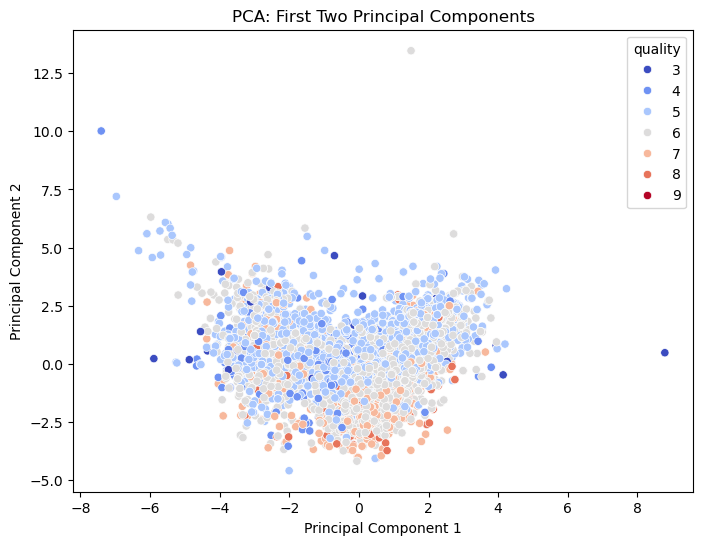

In [73]:
#Creating a 2D scatter plot for the first two principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=wine_data['quality'], palette='coolwarm')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The PCA plot represents a linear transformation of the dataset, maintaining the overall structure while reducing dimensionality. The distribution of points is based on variance; however, distinct clusters are not clearly visible. Since PCA is a linear technique, it may struggle to capture complex, nonlinear relationships within the data. The significant overlap of data points suggests that PCA might not be the most effective method for visualizing well-separated clusters in this dataset.

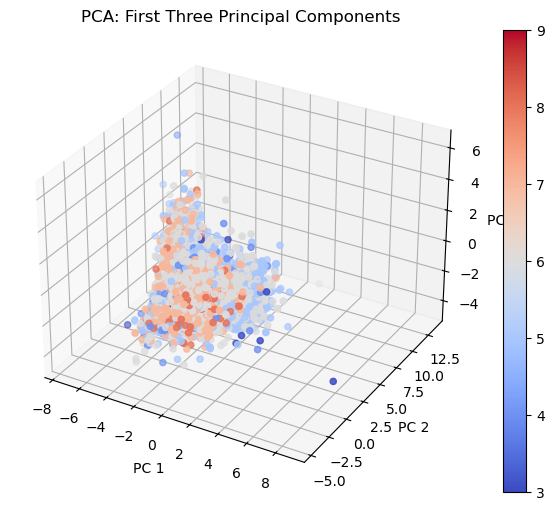

In [76]:
#Creating a 3D scatter plot for the first three principal components
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2], c=wine_data['quality'], cmap='coolwarm')
ax.set_title("PCA: First Three Principal Components")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.colorbar(scatter)
plt.show()


2.4 Discussion on PCA & Information Loss

PCA reduces dimensions while preserving as much variance as possible.
Explained variance ratio tells us how much information each principal component retains.
Trade-off: Reducing dimensions means some information is lost, but visualization and computational efficiency improve.
From the cumulative variance: If the first two PCs explain ~80% of the variance, PCA is effective. If they explain less, we might lose significant information

Dimensionality Reduction (DR): PCA reduces the number of features while retaining the most important variance in the data.

Information Loss (IL): As the number of components decreases, some variance is lost, which may impact model performance.

In [80]:
#Applying t-SNE with 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

#Converting to DataFrame for visualization
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE Component 1', 'TSNE Component 2'])
tsne_df['quality'] = wine_data['quality']


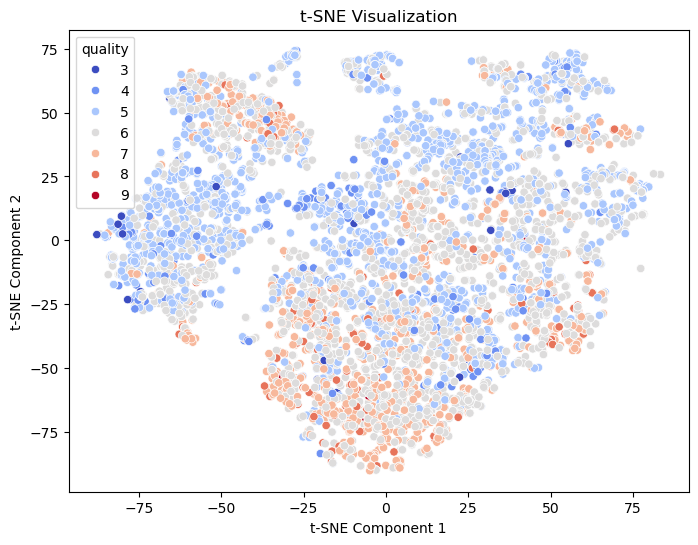

In [82]:
#plot for t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_df['TSNE Component 1'], y=tsne_df['TSNE Component 2'], hue=tsne_df['quality'], palette='coolwarm')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

The t-SNE plot applies a nonlinear transformation that efficiently groups similar data points. Unlike PCA, which focuses on preserving global variance, t-SNE prioritizes local structure, making it more effective for distinguishing meaningful clusters. In this case, wine samples with similar quality scores tend to form distinct groups, revealing hidden patterns within the data. However, since t-SNE does not maintain a direct relationship with the original feature space, its axes lack interpretability, making it less suitable for understanding how individual features contribute to the separation.

Comparison of PCA and t-SNE:
PCA is a **linear** technique that finds directions of maximum variance.
t-SNE is **non-linear** and focuses on preserving local similarities.
PCA is useful for **interpretability** but may not separate clusters well.
t-SNE is good for **clustering visualization**, but it distorts global structure.
PCA is computationally cheaper than t-SNE.

Captures Global vs. Local Structure:

PCA: Captures global structure, but may lose fine details

t-SNE: Preserves local structure, making clusters more distinct

Scalability

PCA: Computationally efficient, works well with large datasets

t-SNE: Computationally expensive, especially for large datasets

Interpretability

PCA: Components have a clear mathematical meaning (variance explained)

t-SNE: Hard to interpret mathematically

Information Loss

PCA: Some information is lost when selecting fewer principal components.

t-SNE: t-SNE retains neighborhood structure, but global relationships may be distorted
